## The Dataset

![wine dataset](https://images.unsplash.com/photo-1568213816046-0ee1c42bd559?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=872&q=80)

photo by [Maksym Kaharlytskyi](https://unsplash.com/@qwitka) at [Unsplash](https://unsplash.com/)

The Wine Quality Data Set is one the most used dataset in data science, since it can be used for regression analysis or for multiclass classification. Originally collected in 2009, it is now available on the UCI Machine Learning Repository (1).
The dataset was originally collected and published in the 2009 by Paulo Cortez et al (2).  The dataset is composed of two different data sets. The two dataset contains 12 columns (numeric entries), where 11 columns are representing the physicochemical proprieties of Portuguese white and red wine (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol). The last column is the target variable (ordinal data type), representing the quality the wine in a scale range 0-10 (where 0 is very bad and 10 excellent). The quality score was assigned by blind degustation of three different wine experts (the final value is the average of their recension).  Each entry (row) represents the chemical analysis for a wine sample, recorded in a laboratory by a sensory machine. 
The dataset was preprocessed by the researcher, the raw data were collected and to avoid incomplete examples only the most common tests were included.
However, while the red wine dataset contains 4000 entries, the with wine dataset is smaller (roughly 1500 entries). Moreover, not all the features are relevant and they are probably correlated or redundant (for example free sulfur dioxide and total sulfur dioxide, or the first three columns). Another issue, it is that the dataset is not balanced (there are only few examples labeled as poor or excellent wines). Moreover, for privacy issues we are missing different information (the grape type, the brand, price, winery and so on) leading to the risk that some entries are duplicated. Furthermore, since the target variable is based on personal judgement (human subject’s test) there is the risk that the target variable is not linked to the physicochemical proprieties of the wine and the model could be not accurate (due to intrinsic data collection issues).

1.	Cortez et al., Modeling wine preferences by data mining from physicochemical properties, Decision Support Systems. 2009
2.	https://archive.ics.uci.edu/ml/datasets/wine+quality

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
red = "https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/datasets/winequality-red.csv"
white = "https://raw.githubusercontent.com/SalvatoreRa/tutorial/main/datasets/winequality-red.csv"
red = pd.read_csv(red, sep = ";")
white = pd.read_csv(white, sep = ";")

In [ ]:
white.describe() #this function shows mean, count and other useful information

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#the attribute info of the dataframe returns type of the feature and if there are missing values
#non-null is not missing value
white.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


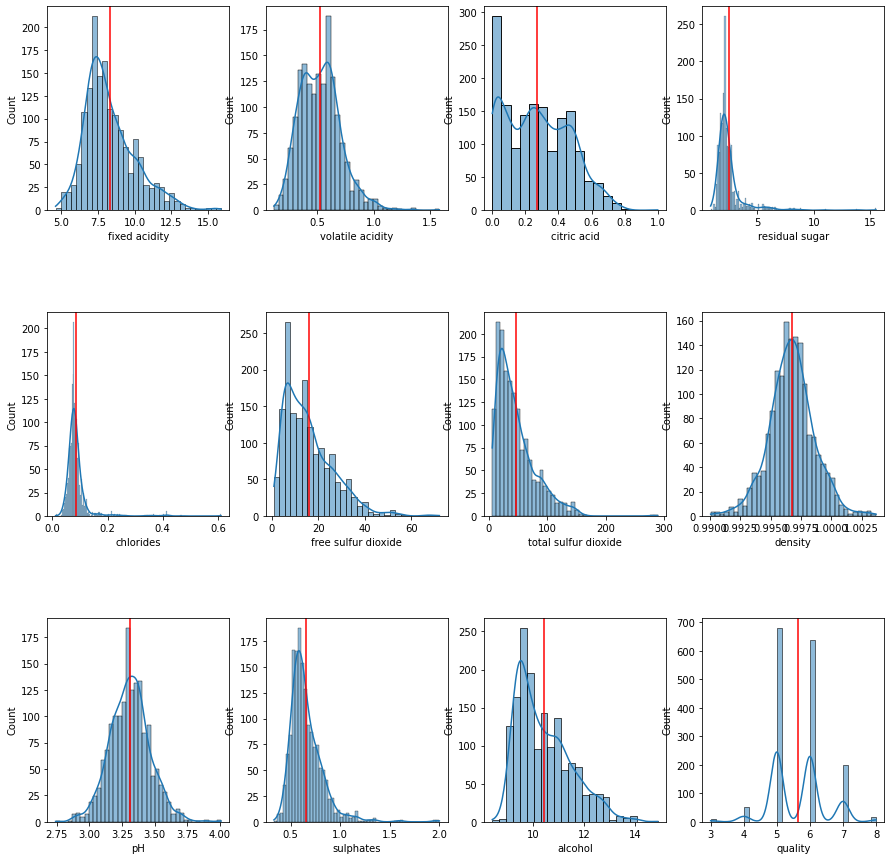

In [ ]:
#to plot together:
fig, axes = plt.subplots(3, 4, figsize=(15, 15))
fig.subplots_adjust(hspace = .5, wspace=0.2)
axs = axes.ravel()

#loop over all the features
for i in range(white.shape[1]):
    sns.histplot(white[white.columns[i]], ax = axs[i], kde=True ) #create histogram
    axs[i].axvline(x=white[white.columns[i]].mean(),color='red')

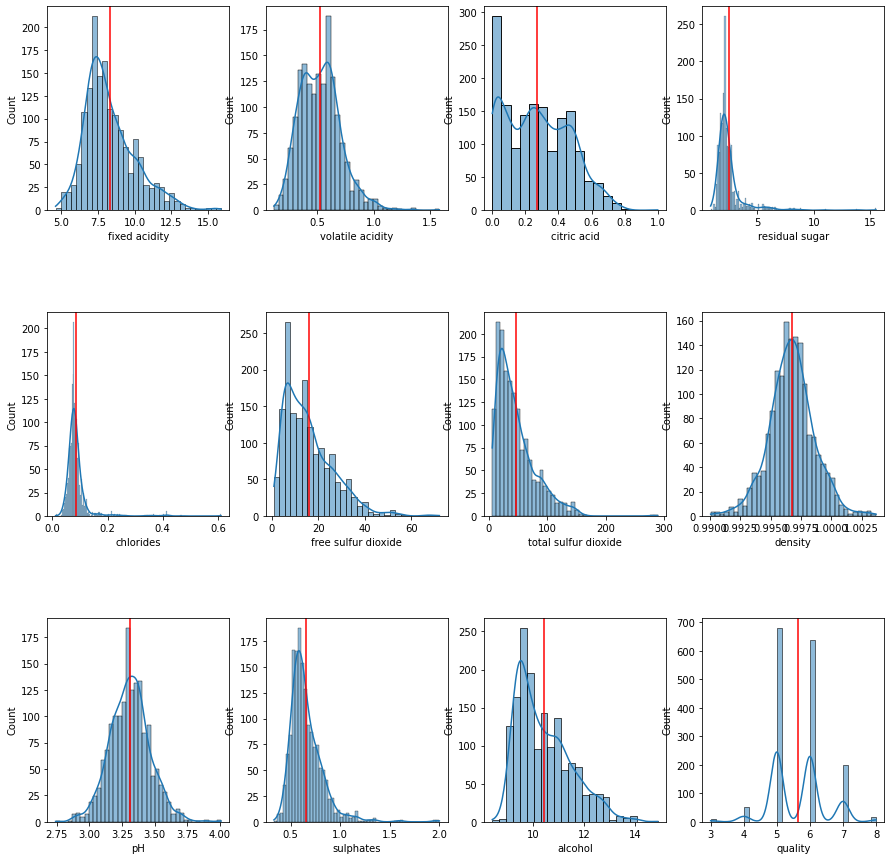

In [ ]:
#the same for the second dataset
fig, axes = plt.subplots(3, 4, figsize=(15, 15))
fig.subplots_adjust(hspace = .5, wspace=0.2)
axs = axes.ravel()

for i in range(red.shape[1]):
    sns.histplot(red[red.columns[i]], ax = axs[i], kde=True )
    axs[i].axvline(x=red[red.columns[i]].mean(),color='red')

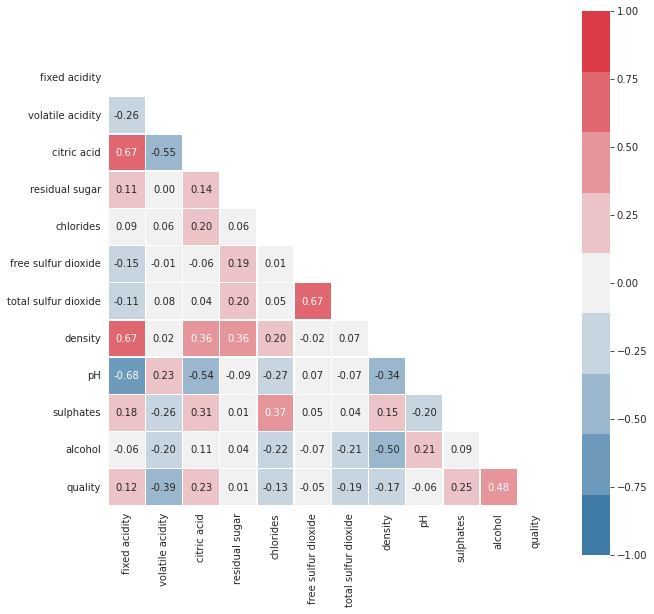

In [ ]:
#a heatmap is showing clearing correlation (red) and anticorrelation (blue)
corr = white.corr() #calulating the correlation
mask = np.zeros_like(corr) #to mask the other corner, which is redundant
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask, linewidths=.5, 
                     cmap=sns.diverging_palette(240, 10, n=9), #diverging palette to show corr and anticorr in different colors
                     vmin = -1, vmax = 1, annot=True, fmt=".2f", square=True)

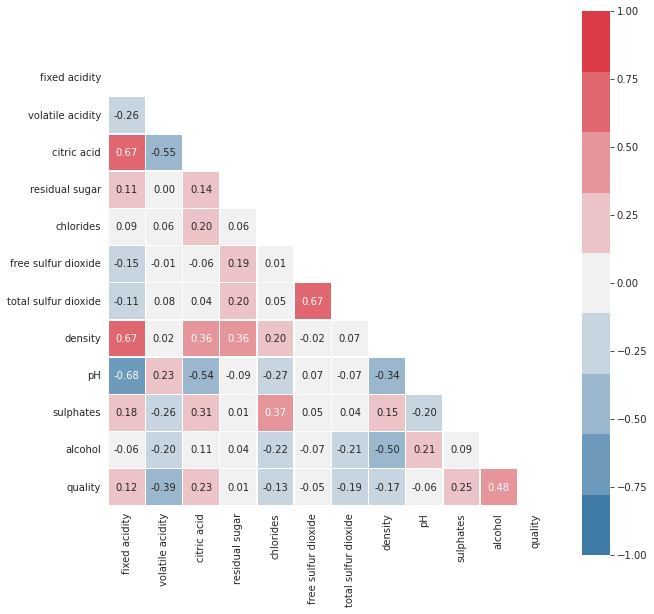

In [ ]:
corr = red.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask, linewidths=.5, cmap=sns.diverging_palette(240, 10, n=9), 
                     vmin = -1, vmax = 1, annot=True, fmt=".2f", square=True)

Text(0.5, 1.0, 'red wine')

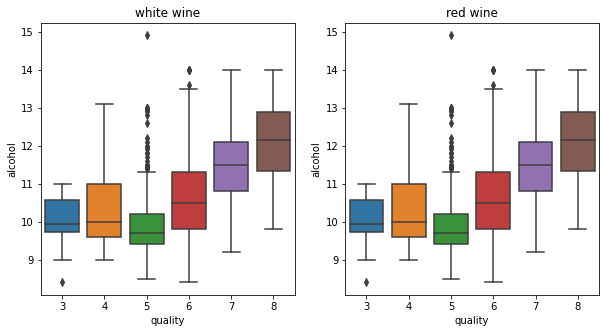

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(hspace = .5, wspace=0.2)
axs = axes.ravel()
#plotting a boxplot for each dataframe
sns.boxplot(x="quality", y="alcohol", ax = axs[0], data=white)
sns.boxplot(x="quality", y="alcohol", ax = axs[1], data=red)
axs[0].set_title('white wine')
axs[1].set_title('red wine')

Text(0.5, 1.0, 'red wine')

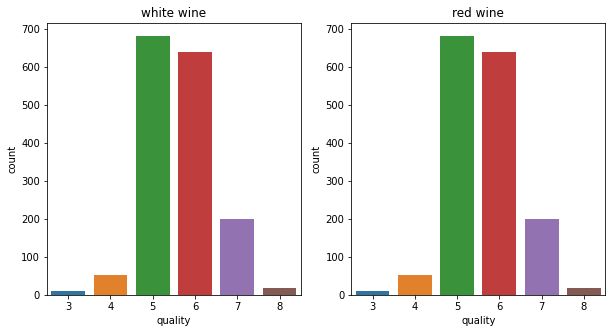

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(hspace = .5, wspace=0.2)
axs = axes.ravel()
#barplot, one for each dataset
sns.countplot(x="quality",  ax = axs[0], data=white)
sns.countplot(x="quality",  ax = axs[1], data=red)
axs[0].set_title('white wine')
axs[1].set_title('red wine')